#                                        ASSIGNMENT - 4 
###    Logistic regression, Decision tree and random forest classifiers on Employee Attrition dataset

## Data Preprocessing.

In [1]:
#Importing necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the dataset.
df=pd.read_csv("Employee-Attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
#Checking for Null Values.
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

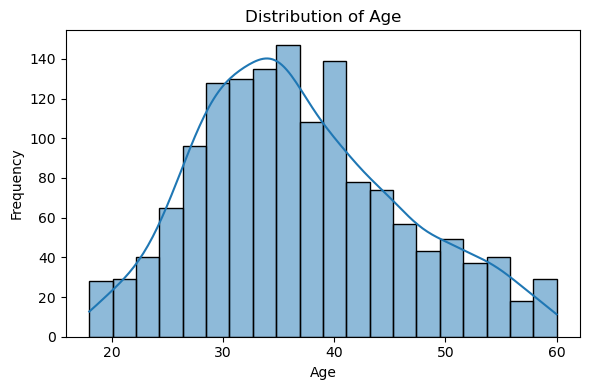

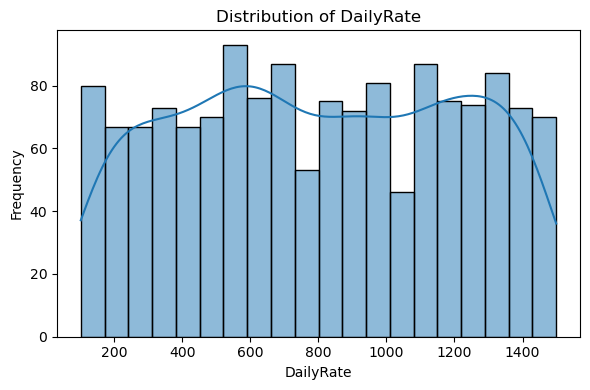

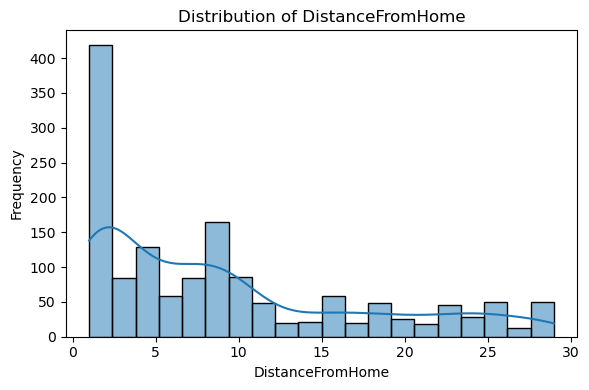

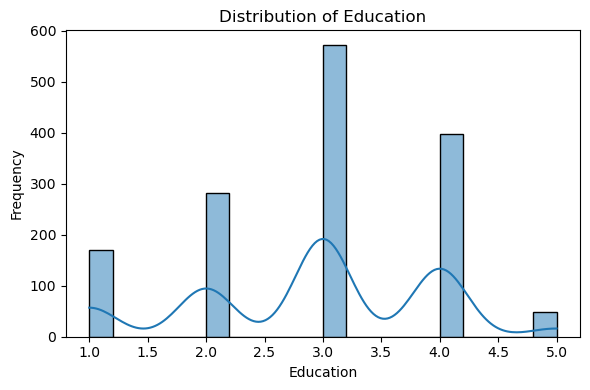

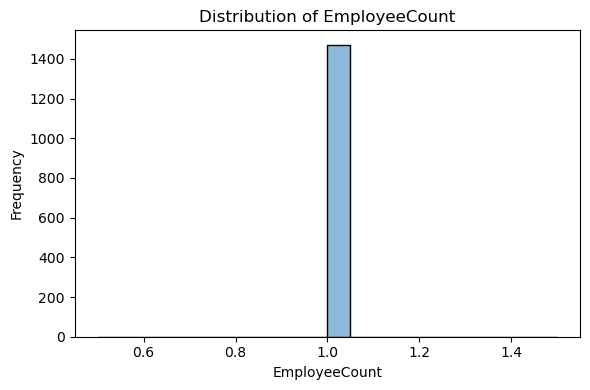

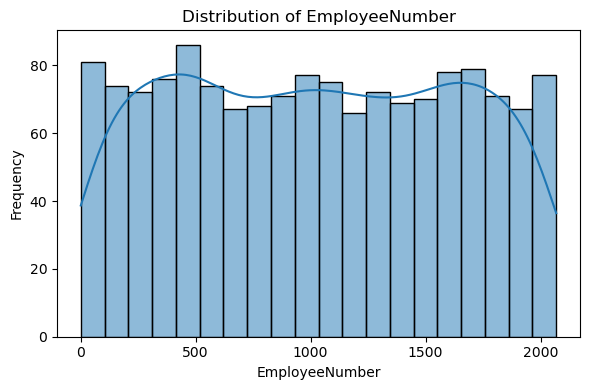

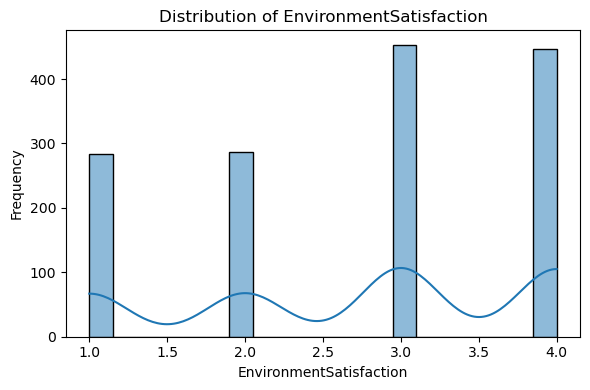

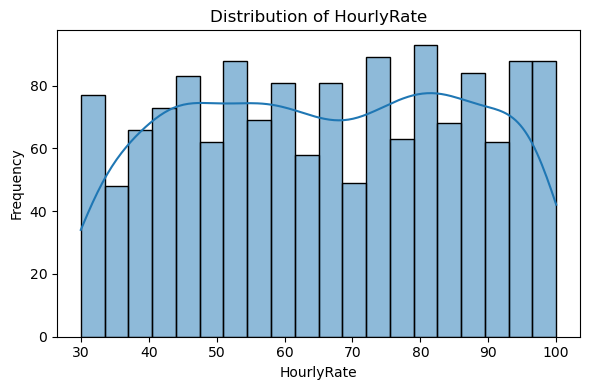

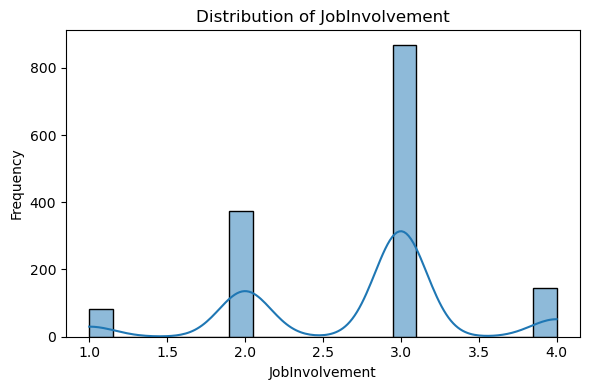

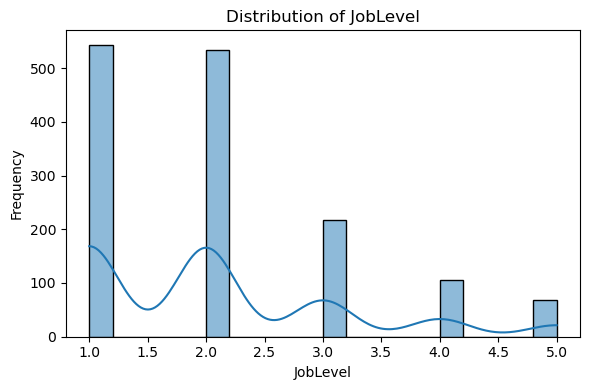

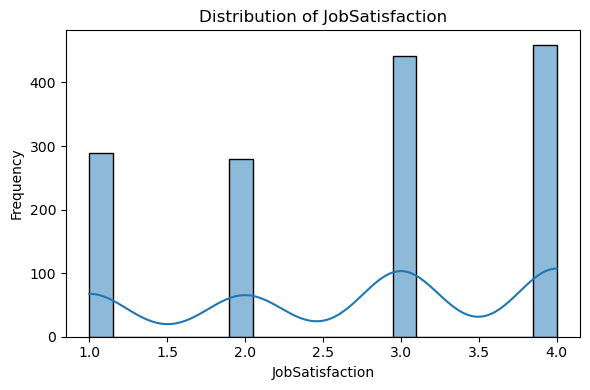

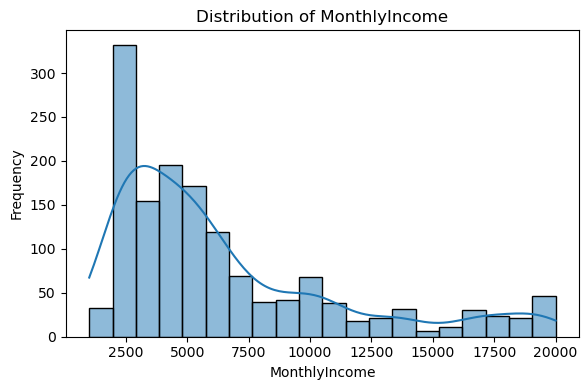

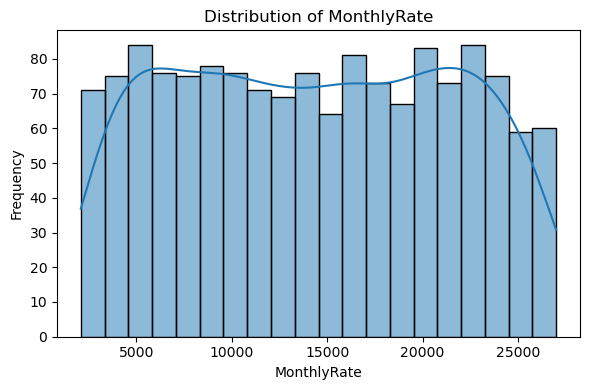

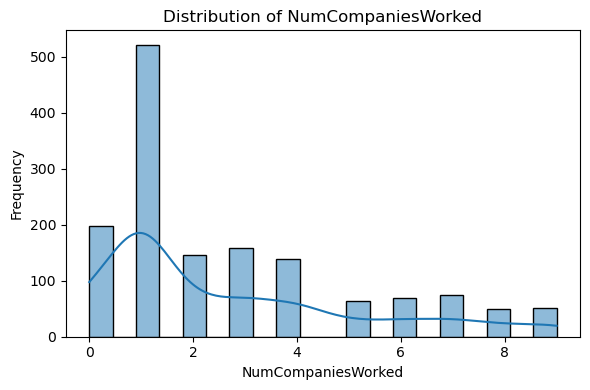

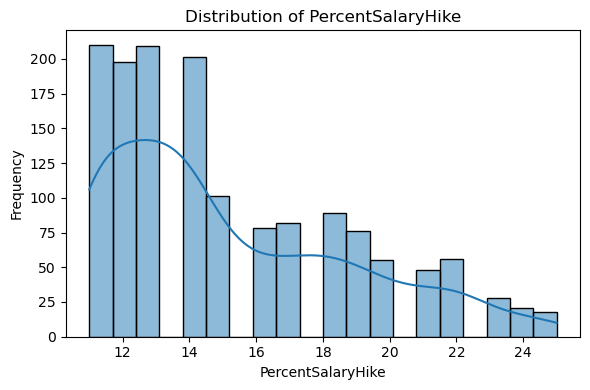

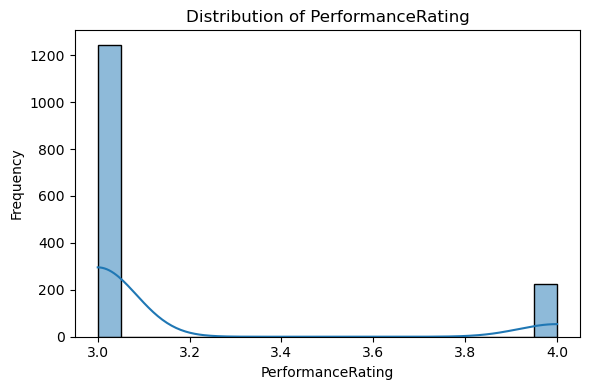

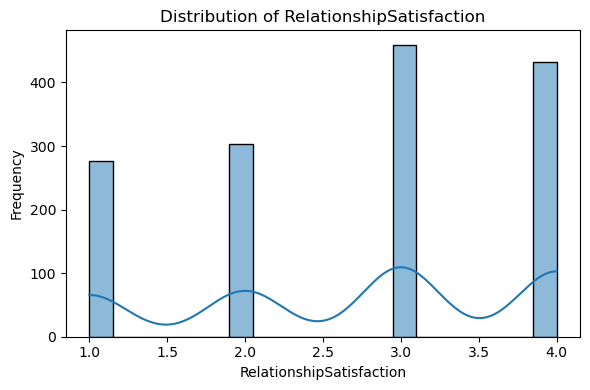

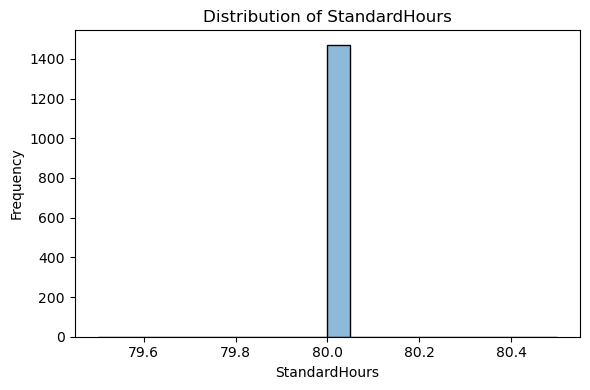

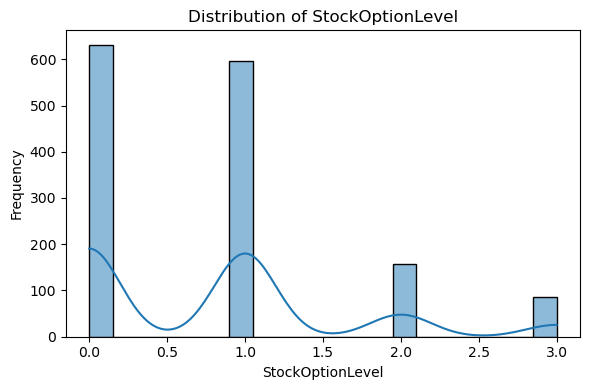

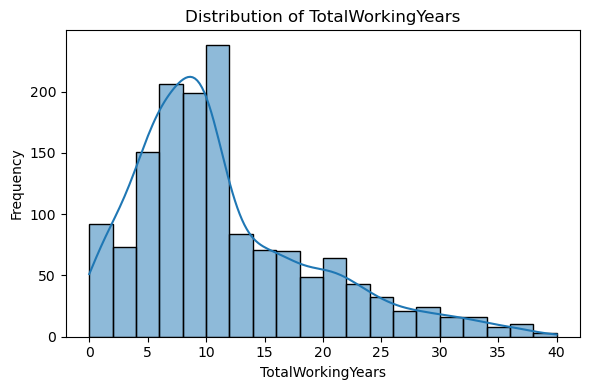

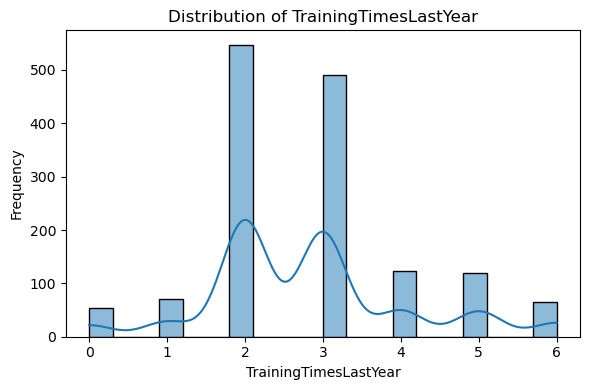

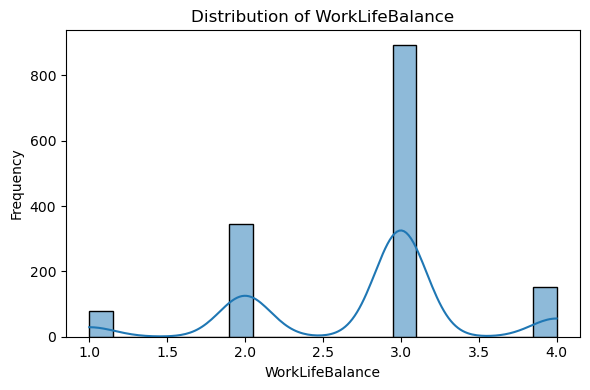

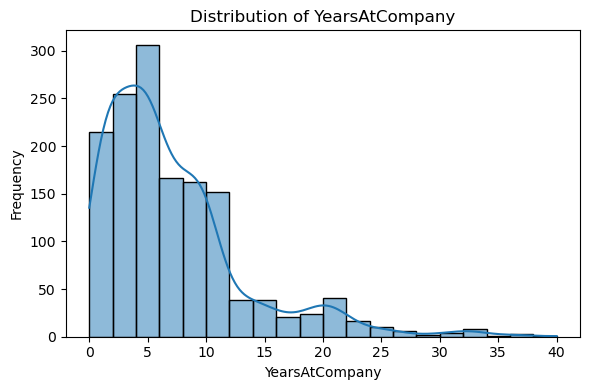

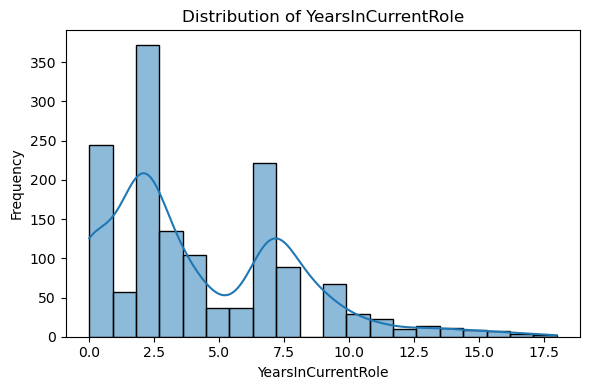

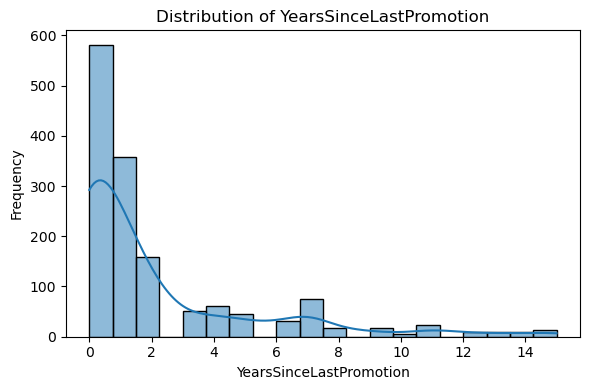

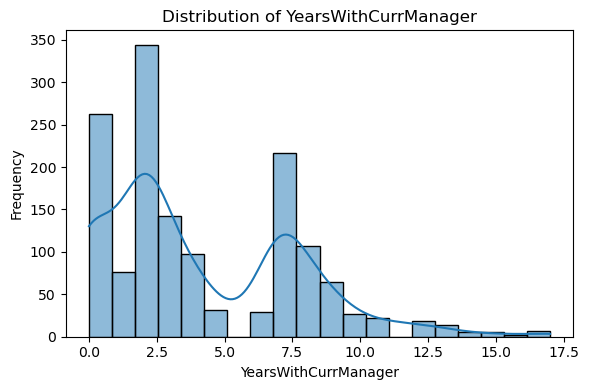

In [7]:
#Data Visualization.

# List of numerical columns
numerical_columns = df.select_dtypes(include=['int64']).columns

# Create histogram plots for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

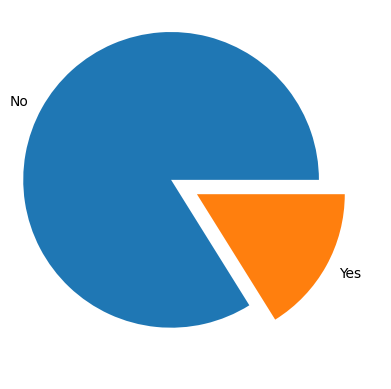

In [8]:
# Pie chart for Employee Attritions
attrition_count = pd.DataFrame(df['Attrition'].value_counts())
plt.pie(attrition_count['Attrition'], labels = ['No', 'Yes'], explode = (0.2,0))
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_39296\1778525555.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

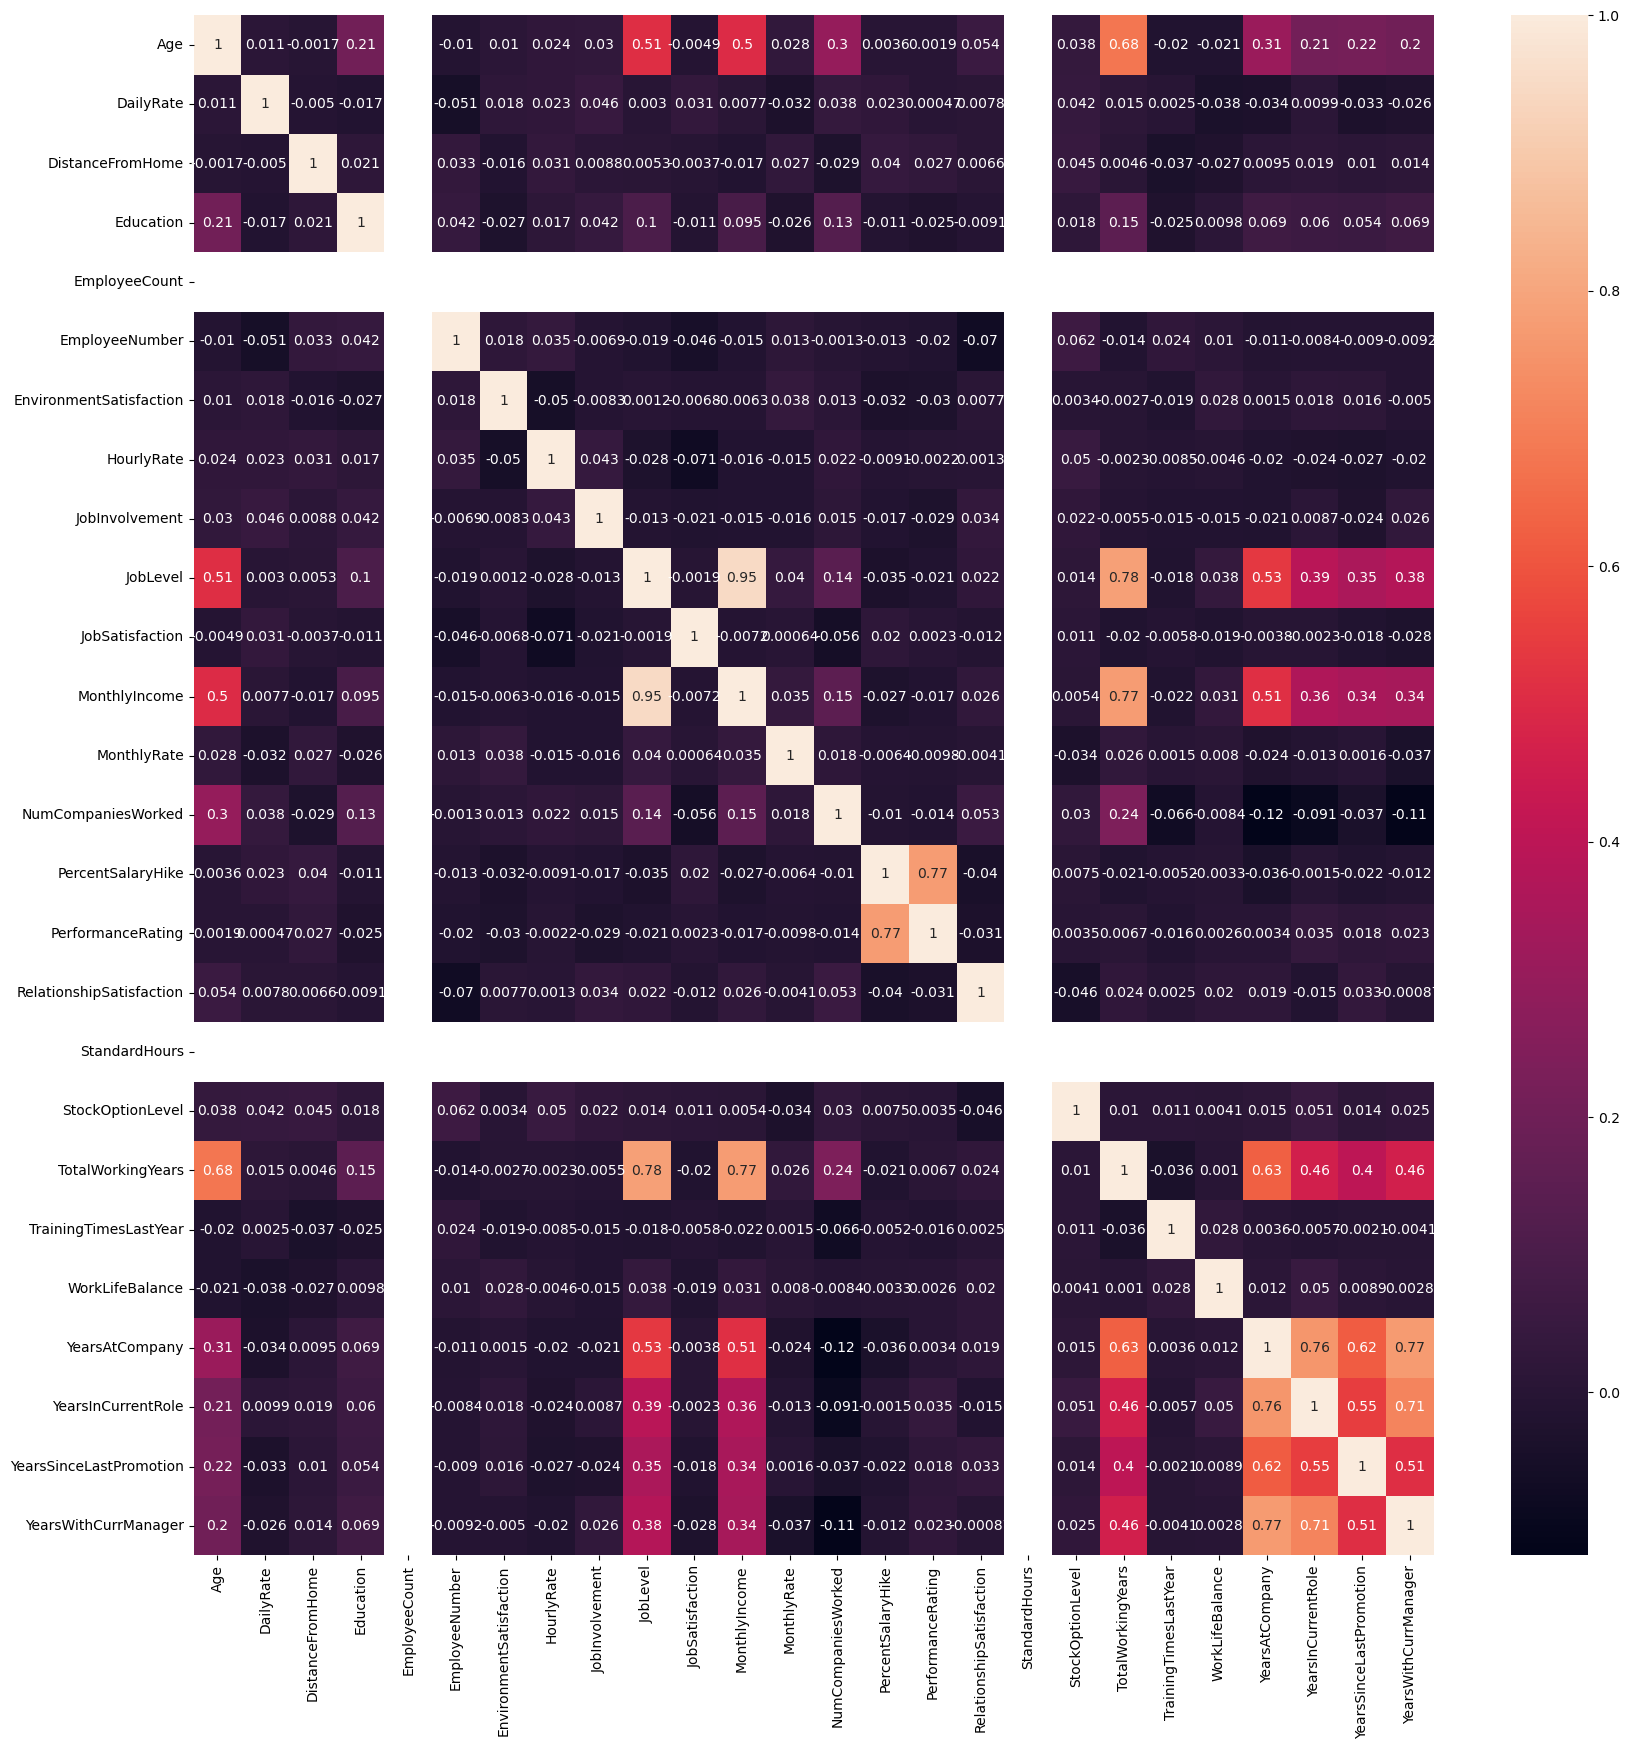

In [9]:
# Heatmap of the dataset
plt.figure(figsize=[20,20])
sns.heatmap(df.corr(),annot=True)

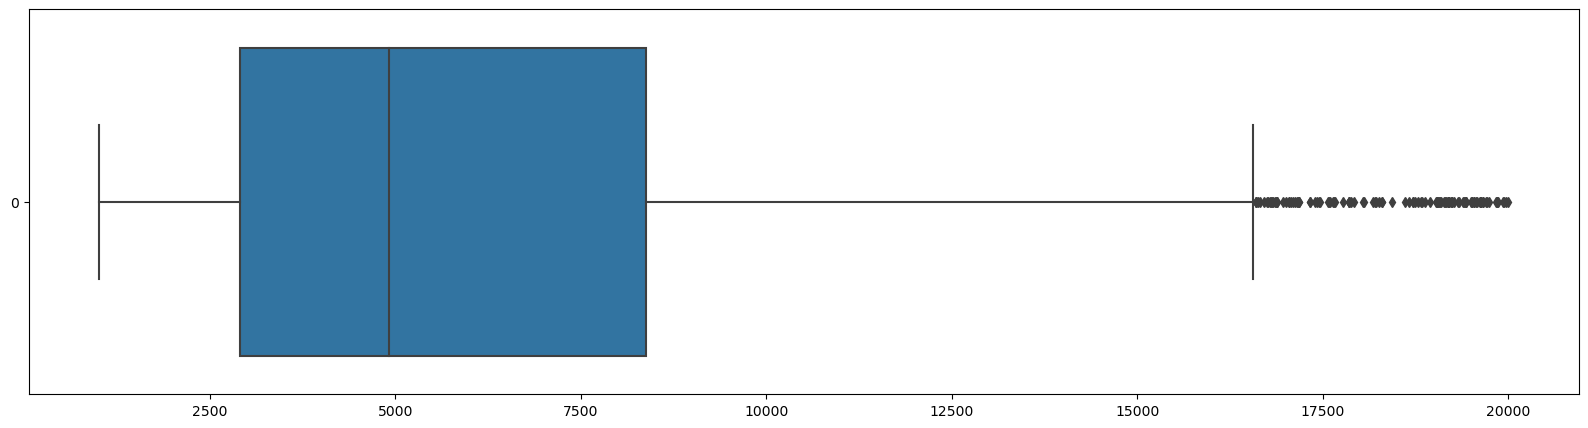

In [10]:
#Outlier detection
plt.figure(figsize=[20,5])
sns.boxplot(df['MonthlyIncome'],orient='h')
plt.show()

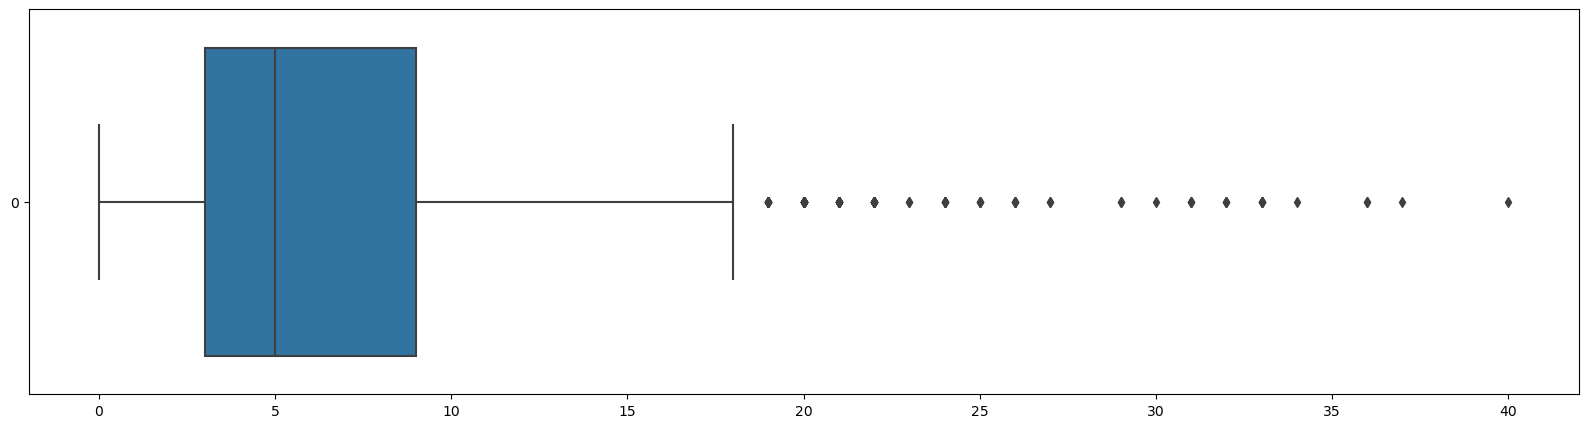

In [11]:
plt.figure(figsize=[20,5])
sns.boxplot(df['YearsAtCompany'],orient='h')
plt.show()

In [12]:
# Label Encoding
categories = ['BusinessTravel','Department','Education','EducationField','Gender','MaritalStatus','OverTime',
              'EnvironmentSatisfaction','JobInvolvement','JobLevel','JobRole','JobSatisfaction','NumCompaniesWorked',
              'PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance']
categorical = df[categories].astype('object')
categorical = pd.get_dummies(df[categories], drop_first = True)

In [13]:
# Splitting Dependent and Independent variables
independent = ['Attrition','Over18','EmployeeCount','StandardHours','EmployeeNumber']
continuous = df.drop(columns= categories)
continuous = continuous.drop(columns= independent)

In [14]:
# X - Features, Y- Target variables
X = pd.concat([categorical,continuous],axis=1)
Y = df['Attrition'].replace({'Yes': 1, 'No': 0}).values.reshape(-1,1)

In [15]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

continuous_variables = list(continuous.columns)

X = X.reset_index()
del X['index']
X[continuous_variables] = pd.DataFrame(scaler.fit_transform(X[continuous_variables]), columns = continuous_variables)

In [16]:
#Splitting Data into Train and Test.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [17]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1176, 44), (294, 44), (1176, 1), (294, 1))

## Logistic Regression model

In [18]:
#Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [19]:
#Initializing the model
lr = LogisticRegression()

In [20]:
#Training the model
lr.fit(x_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
#Testing the model
y_pred = lr.predict(x_test)

In [22]:
# Evaluation of model
# Accuracy score
print("Accuracy of Logistic regression model:",accuracy_score(y_test,y_pred))

Accuracy of Logistic regression model: 0.8843537414965986


In [23]:
# Precision score
precision_yes = precision_score(y_test, y_pred, pos_label=1)
print("Precision (Yes): " + str(round(precision_yes, 2)))
precision_no = precision_score(y_test, y_pred, pos_label=0)
print("Precision (No): " + str(round(precision_no, 2)))

Precision (Yes): 0.76
Precision (No): 0.9


In [24]:
# Recall score
recall_yes = recall_score(y_test, y_pred, pos_label=1)
print("Recall (Yes): " + str(round(recall_yes, 2)))
recall_no = recall_score(y_test, y_pred, pos_label=0)
print("Recall (No): " + str(round(recall_no, 2)))

Recall (Yes): 0.45
Recall (No): 0.97


In [25]:
# F1 score
f1_score_yes = f1_score(y_test, y_pred, pos_label=1)
print("F1 Score (Yes): " + str(round(f1_score_yes, 2)))
f1_score_no = f1_score(y_test, y_pred, pos_label=0)
print("F1 Score (No): " + str(round(f1_score_no, 2)))

F1 Score (Yes): 0.56
F1 Score (No): 0.93


In [26]:
# Confusion matrix
print("Confusion matrix:\n\n",confusion_matrix(y_test,y_pred))

Confusion matrix:

 [[238   7]
 [ 27  22]]


In [27]:
# Classification Report
print("Classification report of Logistic Regression model:\n\n",classification_report(y_test,y_pred))

Classification report of Logistic Regression model:

               precision    recall  f1-score   support

           0       0.90      0.97      0.93       245
           1       0.76      0.45      0.56        49

    accuracy                           0.88       294
   macro avg       0.83      0.71      0.75       294
weighted avg       0.87      0.88      0.87       294



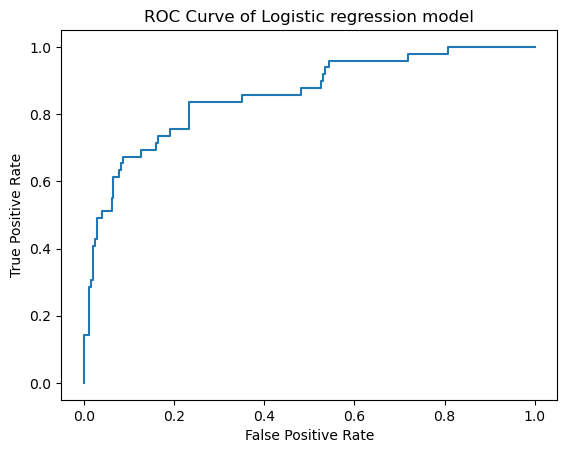

In [28]:
# ROC curve  
probability = lr.predict_proba(x_test)[:,1]
fpr,tpr,threshsholds = roc_curve(y_test,probability)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Logistic regression model')
plt.show()

## Decision Tree Classifier

In [29]:
# Importing necesary packages
from sklearn.tree import DecisionTreeClassifier

In [30]:
# Initializing the model
dtc = DecisionTreeClassifier(random_state=30)

In [31]:
# Training the model
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=30)

In [32]:
# Testing the model
y_pred1 = dtc.predict(x_test)

In [33]:
# Evaluation metrics
# Accuracy score
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy of Decision tree model: ",accuracy)

Accuracy of Decision tree model:  0.7517006802721088


In [34]:
# Precision score
precision_yes = precision_score(y_test, y_pred1, pos_label=1)
print("Precision (Yes): " , str(round(precision_yes,2)))
precision_no = precision_score(y_test, y_pred1, pos_label=0)
print("Precision (No): " + str(round(precision_no, 2)))

Precision (Yes):  0.27
Precision (No): 0.86


In [35]:
# Recall score
recall_yes = recall_score(y_test, y_pred1, pos_label=1)
print("Recall (Yes): " + str(round(recall_yes, 2)))
recall_no = recall_score(y_test, y_pred1, pos_label=0)
print("Recall (No): " + str(round(recall_no, 2)))

Recall (Yes): 0.29
Recall (No): 0.84


In [36]:
# F1 score
f1_score_yes = f1_score(y_test, y_pred1, pos_label=1)
print("F1 Score (Yes): " + str(round(f1_score_yes, 2)))
f1_score_no = f1_score(y_test, y_pred1, pos_label=0)
print("F1 Score (No): " + str(round(f1_score_no, 2)))

F1 Score (Yes): 0.28
F1 Score (No): 0.85


In [37]:
# Classification report
print("Classification report of Decision tree model:\n\n",classification_report(y_test,y_pred1))

Classification report of Decision tree model:

               precision    recall  f1-score   support

           0       0.86      0.84      0.85       245
           1       0.27      0.29      0.28        49

    accuracy                           0.75       294
   macro avg       0.56      0.57      0.56       294
weighted avg       0.76      0.75      0.75       294



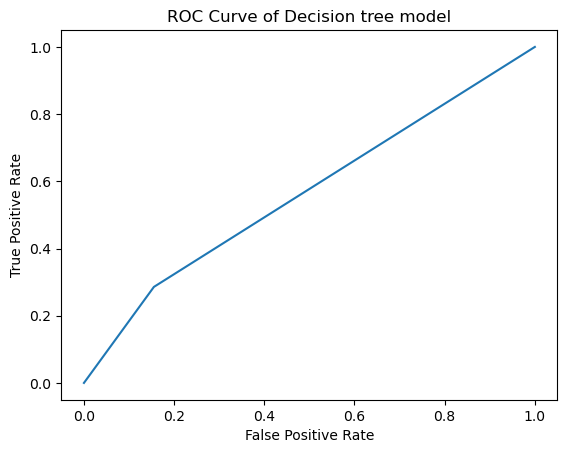

In [38]:
# ROC curve
probability = dtc.predict_proba(x_test)[:,1]
fpr,tpr,threshsholds = roc_curve(y_test,probability)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Decision tree model')
plt.show()

## Random Forest Classifier

In [39]:
# Importing necessary packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [40]:
# Initializing the model
rf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=30)

In [41]:
# Training the model
rf.fit(x_train, y_train)

C:\Users\Admin\AppData\Local\Temp\ipykernel_39296\391630832.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=30)

In [42]:
rf.score(x_train, y_train)

0.983843537414966

In [43]:
# Testing the model
y_pred2 = rf.predict(x_test)

In [44]:
# Evaluation metrics
# Accuracy score
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy of Random forest model: ",accuracy)

Accuracy of Random forest model:  0.8435374149659864


In [45]:
# Precision score
precision_yes = precision_score(y_test, y_pred2, pos_label=1)
print("Precision (Yes): " , str(round(precision_yes,2)))
precision_no = precision_score(y_test, y_pred2, pos_label=0)
print("Precision (No): " + str(round(precision_no, 2)))

Precision (Yes):  0.71
Precision (No): 0.85


In [46]:
# Recall score
recall_yes = recall_score(y_test, y_pred2, pos_label=1)
print("Recall (Yes): " + str(round(recall_yes, 2)))
recall_no = recall_score(y_test, y_pred2, pos_label=0)
print("Recall (No): " + str(round(recall_no, 2)))

Recall (Yes): 0.1
Recall (No): 0.99


In [47]:
# F1 score
f1_score_yes = f1_score(y_test, y_pred2, pos_label=1)
print("F1 Score (Yes): " + str(round(f1_score_yes, 2)))
f1_score_no = f1_score(y_test, y_pred2, pos_label=0)
print("F1 Score (No): " + str(round(f1_score_no, 2)))

F1 Score (Yes): 0.18
F1 Score (No): 0.91


In [48]:
# Classification Report
print("Classification report of Random Forest model:\n\n",classification_report(y_test,y_pred2))

Classification report of Random Forest model:

               precision    recall  f1-score   support

           0       0.85      0.99      0.91       245
           1       0.71      0.10      0.18        49

    accuracy                           0.84       294
   macro avg       0.78      0.55      0.55       294
weighted avg       0.82      0.84      0.79       294



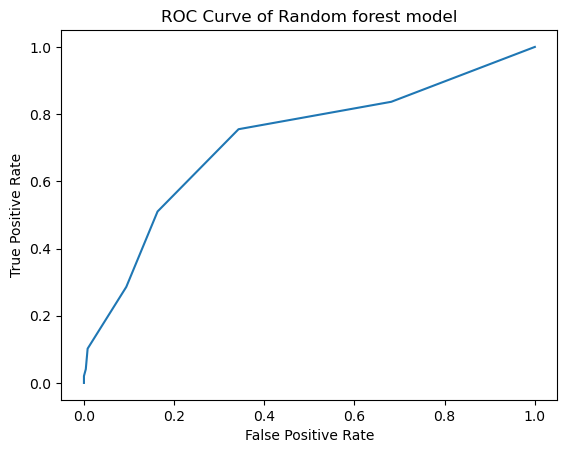

In [49]:
# ROC curve
probability = rf.predict_proba(x_test)[:,1]
fpr,tpr,threshsholds = roc_curve(y_test,probability)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Random forest model')
plt.show()

## Final Accuracies

In [50]:
print("Accuracy of Logistic regression model: ", accuracy_score(y_test, y_pred))
print("Accuracy of Decision tree classifier model: ", accuracy_score(y_test, y_pred1))
print("Accuracy of Random forest classifier model: ", accuracy_score(y_test, y_pred2))

Accuracy of Logistic regression model:  0.8843537414965986
Accuracy of Decision tree classifier model:  0.7517006802721088
Accuracy of Random forest classifier model:  0.8435374149659864
